# Project: Investigation of TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>
> The Data for Analysis is a TMDb movie dataset ontains information about over 10,000 movies collected from The Movie Database (TMDb) and includes user ratings and revenue.
> Some of the questions to answer with this dataset includes the following
> 1) What is the most common genre of movies
>
> 2) What is the Most popular genre of Movie year-year
>
> 3) What are the Characteristics of movies with high revenue

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines.
movies = pd.read_csv('tmdb_movies.csv')
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Some columns such as cast, genre and production companies conains multiple values separated by pipes(|)

In [3]:
movies.shape

(10866, 21)

The cell above shows the number of rows and columns in the dataset

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### The cell above shows the following; 

- There are missings values in various columns such as imdb id, Cast, Homepage, director Tagline, Keyword, overview, genre and production companies

- Release date and year were represented as object and integer respectively

- Some columns such as imdb id, homepage, tagline and overview are not relevant to the research question and will be dropped

In [5]:
def miss_data_count(df):
    """Counts the number of missing data in a dataframe.

    Args:
        df : The name of dataframe.

    Returns: 
        The total number of missing data in each column of data frame
    """
    return df.isna().sum()

The cell above creates a user function for checking for number of missing data per column

In [6]:
miss_data_count(movies)

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The cell above shows the number of missing data on various columns

In [7]:
movies.query('production_companies != production_companies')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,300792,tt1618448,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,http://www.racingextinction.com,Louie Psihoyos,It's better to light one candle than curse the...,...,An unlikely team of activists and innovators h...,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,0.0,0.0
259,360603,tt5133572,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,NaN,Alex Zamm,NaN,...,After getting fired from her job as a maid at ...,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.0,0.0
295,363483,tt5133810,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,NaN,Peter Sullivan,NaN,...,"When Anna Parisi, an unemployed fine arts pain...",84,Family|TV Movie,NaN,11/26/15,12,6.3,2015,0.0,0.0
298,354220,tt3826866,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,NaN,Nick Simon,NaN,...,Images coming from the crimes committed by a d...,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.0,0.0
328,308457,tt3090670,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,NaN,Jennifer Phang,NaN,...,In a near-future city where soaring opulence o...,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,15867,tt0077742,0.149259,0,0,Interiors,Diane Keaton|Kristin Griffith|Mary Beth Hurt|R...,NaN,Woody Allen,NaN,...,Homage to Ingmar Bergman in this family drama ...,93,Drama,NaN,8/2/78,35,6.3,1978,0.0,0.0
10806,24998,tt0077598,0.138635,0,0,Gates of Heaven,Lucille Billingsley|Zella Graham|Cal Harberts|...,NaN,Errol Morris,Death is for the living and not for the dead s...,...,"The men who run a pet cemetery, and the men an...",85,Documentary,NaN,10/1/78,12,5.9,1978,0.0,0.0
10816,16378,tt0077147,0.064602,0,0,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,NaN,Eric Idle|Gary Weis,NaN,...,The story of the rise and fall of the Pre-Fab ...,76,Comedy,NaN,3/22/78,14,6.0,1978,0.0,0.0
10842,36540,tt0061199,0.253437,0,0,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,NaN,Wolfgang Reitherman,NaN,...,Christopher Robin's bear attempts to raid a be...,25,Animation|Family,NaN,1/1/66,12,7.9,1966,0.0,0.0


The cell above examines the rows where the values in column with name "production companies" is missing and since a large number of about 1030 data is missing and cannot be populated by imputation, it will be dropped

In [8]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The cell above shows a descriptive analysis of the data set

### Data Cleaning 

The followoing cleaning will be carried out on the dataset
- Dropping of columns and/or rows that are either not relevant to the research questions or has large number of missing data that cannot be imputed such as id, imdb_id, homepage, tagline, keywords, overview, production companies
- Splitting and exploding of columns that have multiple values separated by Pipes(|)

In [9]:
movies.drop(['id','imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)
movies.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Columns that are not relevant to the research questions and with high number of missing data that cannot be imputed were dropped on the above cell

In [10]:
movies.dropna(axis=0, inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10732 non-null  float64
 1   budget          10732 non-null  int64  
 2   revenue         10732 non-null  int64  
 3   original_title  10732 non-null  object 
 4   cast            10732 non-null  object 
 5   director        10732 non-null  object 
 6   runtime         10732 non-null  int64  
 7   genres          10732 non-null  object 
 8   release_date    10732 non-null  object 
 9   vote_count      10732 non-null  int64  
 10  vote_average    10732 non-null  float64
 11  release_year    10732 non-null  int64  
 12  budget_adj      10732 non-null  float64
 13  revenue_adj     10732 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In the cell above, rows with missing values were dropped

In [11]:
miss_data_count(movies)

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

The cell above confirms non-availability of missing data in the data sets

In [12]:
movies.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
movies['release_date'] = movies['release_date'].astype('datetime64[ns]')

the cell above changed the data type of release date to datetime

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10732 non-null  float64       
 1   budget          10732 non-null  int64         
 2   revenue         10732 non-null  int64         
 3   original_title  10732 non-null  object        
 4   cast            10732 non-null  object        
 5   director        10732 non-null  object        
 6   runtime         10732 non-null  int64         
 7   genres          10732 non-null  object        
 8   release_date    10732 non-null  datetime64[ns]
 9   vote_count      10732 non-null  int64         
 10  vote_average    10732 non-null  float64       
 11  release_year    10732 non-null  int64         
 12  budget_adj      10732 non-null  float64       
 13  revenue_adj     10732 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)


In [15]:
movies_cast = movies.assign(cast = movies['cast'].str.split('|')).explode('cast', ignore_index=True)
movies_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52339 entries, 0 to 52338
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      52339 non-null  float64       
 1   budget          52339 non-null  int64         
 2   revenue         52339 non-null  int64         
 3   original_title  52339 non-null  object        
 4   cast            52339 non-null  object        
 5   director        52339 non-null  object        
 6   runtime         52339 non-null  int64         
 7   genres          52339 non-null  object        
 8   release_date    52339 non-null  datetime64[ns]
 9   vote_count      52339 non-null  int64         
 10  vote_average    52339 non-null  float64       
 11  release_year    52339 non-null  int64         
 12  budget_adj      52339 non-null  float64       
 13  revenue_adj     52339 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)


The cell above creates a copy of the dataset where the cast has been split and exploded

In [16]:
movies_genre = movies.assign(genres = movies['genres'].str.split('|')).explode('genres', ignore_index=True)
movies_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26758 entries, 0 to 26757
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      26758 non-null  float64       
 1   budget          26758 non-null  int64         
 2   revenue         26758 non-null  int64         
 3   original_title  26758 non-null  object        
 4   cast            26758 non-null  object        
 5   director        26758 non-null  object        
 6   runtime         26758 non-null  int64         
 7   genres          26758 non-null  object        
 8   release_date    26758 non-null  datetime64[ns]
 9   vote_count      26758 non-null  int64         
 10  vote_average    26758 non-null  float64       
 11  release_year    26758 non-null  int64         
 12  budget_adj      26758 non-null  float64       
 13  revenue_adj     26758 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)


The cell above creates a copy of the dataset where the genre has been split and exploded

In [17]:
movies_genre.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
3,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Most common genre of Movie )

In [18]:
movies_genre['genres'].value_counts()

Drama              4747
Comedy             3775
Thriller           2903
Action             2377
Romance            1708
Horror             1636
Adventure          1465
Crime              1354
Science Fiction    1222
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: genres, dtype: int64

### Research Question 2  (Most popular genre of Movie year-year)

In [19]:
movies_genre['release_year'].nunique()

56

In [20]:
movies_genre['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

The cell above assessed the unique years represented in the copy of data where genre has been split and exploded

In [21]:
mean_pop_gen = movies_genre.groupby(['release_year', 'genres'])['popularity'].agg('mean').reset_index()
mean_pop_gen

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346479
4,1960,Drama,0.566305
...,...,...,...
1040,2015,Science Fiction,2.297221
1041,2015,TV Movie,0.260574
1042,2015,Thriller,1.401877
1043,2015,War,1.284511


In the cell above, the mean popularity was computed based on release year and genre while resetting the index to allow for further exploration of data

In [22]:
pop_genre = mean_pop_gen.loc[mean_pop_gen.groupby('release_year', sort = False)['popularity'].idxmax()][['release_year', 'genres', 'popularity']]
pop_genre

,release_year,genres,popularity
13,1960,Thriller,0.811910
18,1961,Animation,2.631987
34,1962,Adventure,0.942513
52,1963,Animation,2.180410
83,1964,War,0.930959
95,1965,Music,0.968850
105,1966,Animation,0.585717
123,1967,Animation,2.550704
149,1968,Mystery,1.519456
159,1969,Crime,0.948020


The cell above shows the most popular genre of movies year-year

In [23]:
pop_genre.genres.value_counts()

Adventure          14
Animation          11
Fantasy             8
Crime               5
War                 3
Family              3
Music               2
Mystery             2
Action              2
Science Fiction     2
Western             2
Thriller            1
History             1
Name: genres, dtype: int64

The cell above shows the number of times that each genre ranked the highest across all years

[Text(0.5, 0, 'Genres'), Text(0, 0.5, 'No. of years with highest popularity')]

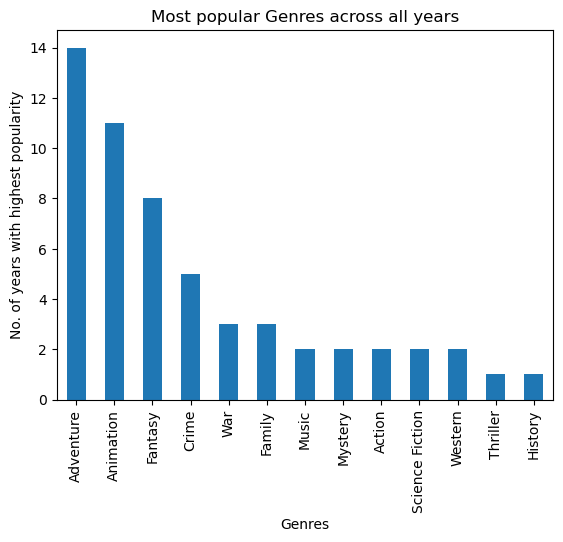

In [24]:
pop_genre.genres.value_counts().plot(kind ='bar', title = 'Most popular Genres across all years').set(xlabel='Genres', ylabel='No. of years with highest popularity')

The cell above shows a bar chart of the number of times that each genre ranked the highest across all release years aimed at determining the most popular genres of movies. iIt reveales that Adventure movies ranked the highest in terms of popularity in 14 diiferent release years, followed by Animations (11) and Fantasy (8)

### Research Question 3  (Characteristics of movies with high revenue)

In [25]:
movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10732.000000,1.073200e+04,1.073200e+04,10732.000000,10732.000000,10732.000000,10732.000000,1.073200e+04,1.073200e+04
mean,0.652609,1.480506e+07,4.031622e+07,102.467853,219.802739,5.964620,2001.260436,1.776644e+07,5.200147e+07
std,1.004757,3.106345e+07,1.176476e+08,30.492619,578.789325,0.930286,12.819831,3.446490e+07,1.454192e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210766,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.387135,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.720621,1.600000e+07,2.500000e+07,112.000000,148.000000,6.600000,2011.000000,2.111556e+07,3.470526e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [26]:
high_rev = movies.query('revenue_adj >= 3.470526e+07')
high_rev.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2683.000000,2.683000e+03,2.683000e+03,2683.000000,2683.000000,2683.000000,2683.000000,2.683000e+03,2.683000e+03
mean,1.438675,4.479652e+07,1.540278e+08,112.113679,690.260902,6.268804,1999.278420,5.313195e+07,1.990016e+08
std,1.669686,4.689129e+07,1.949852e+08,23.323363,999.351206,0.750913,12.290315,4.895573e+07,2.358461e+08
min,0.010335,0.000000e+00,4.905000e+06,26.000000,10.000000,3.400000,1960.000000,0.000000e+00,3.470585e+07
25%,0.598726,1.200000e+07,4.590449e+07,97.000000,128.500000,5.800000,1992.000000,1.837313e+07,6.520988e+07
50%,1.018005,3.000000e+07,8.778419e+07,109.000000,319.000000,6.300000,2002.000000,3.868582e+07,1.144515e+08
75%,1.682839,6.100000e+07,1.780105e+08,123.000000,804.000000,6.800000,2009.000000,7.571684e+07,2.322440e+08
max,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09


the cell above filters and describes the movies with high revenue by using values that is greater than or equal to the 75th percentile on the cleaned unexploded data frame

In [27]:
high_rev['director'].value_counts().head(20)

Steven Spielberg        27
Clint Eastwood          24
Ridley Scott            18
Ron Howard              18
Robert Zemeckis         14
Tim Burton              14
Joel Schumacher         13
Martin Scorsese         13
Richard Donner          12
Chris Columbus          12
Steven Soderbergh       11
Michael Bay             11
Tony Scott              11
Ivan Reitman            11
Oliver Stone            11
Garry Marshall          10
David Fincher           10
Shawn Levy              10
Francis Ford Coppola    10
Barry Levinson          10
Name: director, dtype: int64

[Text(0.5, 0, 'Directors'), Text(0, 0.5, 'Number of movies directed')]

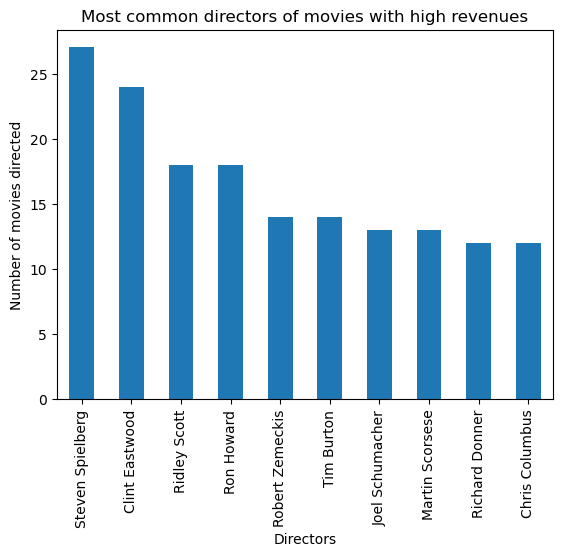

In [28]:
high_rev['director'].value_counts().head(10).plot(kind='bar', title = 'Most common directors of movies with high revenues').set(xlabel='Directors', ylabel='Number of movies directed')

The above cells shows the most common directors among the high revenue movies and bar chart of the first 10 in descending order. It reveales that Steven Spielberg directed the highest number of these high revenued movies with about 27 movies and clint Eastwood (24)

In [29]:
movies_genre.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,26758.000000,2.675800e+04,2.675800e+04,26758.000000,26758.000000,26758.000000,26758.000000,2.675800e+04,2.675800e+04
mean,0.710223,1.763896e+07,4.779010e+07,103.046827,251.664960,5.950071,2000.658831,2.119617e+07,6.133530e+07
std,1.117990,3.470444e+07,1.326337e+08,29.558478,640.066684,0.909437,12.770519,3.829881e+07,1.620401e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.226614,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.414316,2.500000e+04,0.000000e+00,100.000000,44.000000,6.000000,2005.000000,3.784891e+04,0.000000e+00
75%,0.779581,2.000000e+07,3.132790e+07,112.000000,176.000000,6.600000,2011.000000,2.734338e+07,4.441365e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The cells above shows a description of the genre exploded data to determine the 75th percentile of adjusted revenue which will be use to filter rows with high revenue

In [30]:
high_rev_gen = movies_genre.query('revenue_adj >= 4.441365e+07')

the cell above filters the movies with high revenue by using values that is greater than or equal to the 75th percentile on the genre exploded data frame

Text(0, 0.5, 'Adjusted Budget')

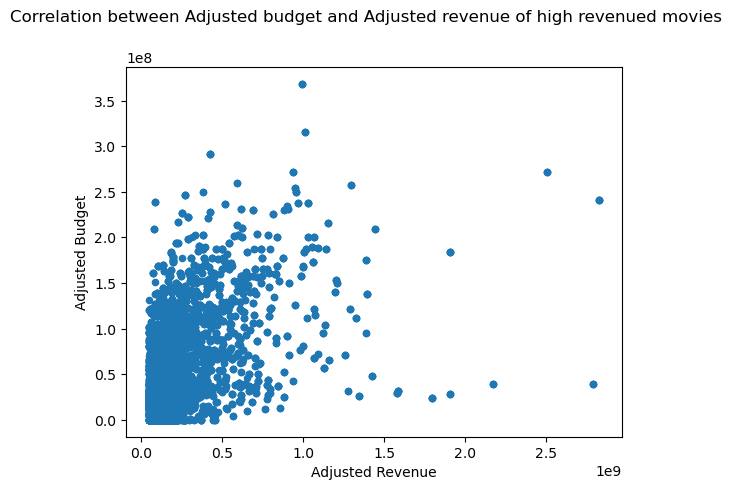

In [31]:
high_rev_gen.plot.scatter(y = 'budget_adj', x = 'revenue_adj')
plt.suptitle('Correlation between Adjusted budget and Adjusted revenue of high revenued movies', y=1)
plt.xlabel('Adjusted Revenue')
plt.ylabel('Adjusted Budget')

The above cell shows a scatter plot between adjusted budget and adjusted revenue aimed at assesing the relationship in movies with high revenues and it shows a positive correlation

In [32]:
movies_cast.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,52339.000000,5.233900e+04,5.233900e+04,52339.000000,52339.000000,52339.000000,52339.000000,5.233900e+04,5.233900e+04
mean,0.663351,1.516831e+07,4.132283e+07,102.953572,224.547546,5.949464,2001.111504,1.820215e+07,5.330126e+07
std,1.013634,3.136444e+07,1.189446e+08,28.887671,585.193340,0.922954,12.867360,3.478194e+07,1.470030e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.216934,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.394271,0.000000e+00,0.000000e+00,99.000000,40.000000,6.000000,2005.000000,0.000000e+00,0.000000e+00
75%,0.733903,1.700000e+07,2.681011e+07,112.000000,154.000000,6.600000,2011.000000,2.210912e+07,3.665686e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [33]:
high_rev_cast = movies_cast.query('revenue_adj >= 3.665686e+07')
high_rev_cast

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,32.985763,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
3,32.985763,150000000,1513528810,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,32.985763,150000000,1513528810,Jurassic World,Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52249,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd,Richard Fleischer,100,Adventure|Science Fiction,2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07
52250,0.207257,5115000,12000000,Fantastic Voyage,Raquel Welch,Richard Fleischer,100,Adventure|Science Fiction,2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07
52251,0.207257,5115000,12000000,Fantastic Voyage,Edmond O'Brien,Richard Fleischer,100,Adventure|Science Fiction,2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07
52252,0.207257,5115000,12000000,Fantastic Voyage,Donald Pleasence,Richard Fleischer,100,Adventure|Science Fiction,2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07


The above cell creates a filter of high revenue movies based on the 75th percentile revenue on the cast exploded data frame

In [34]:
high_rev_cast['cast'].value_counts()

Robert De Niro         39
Bruce Willis           36
Tom Hanks              34
Tom Cruise             33
Robin Williams         32
                       ..
Michael-Leon Wooley     1
Christopher Murney      1
Faith Prince            1
Stephen Fry             1
Arthur O'Connell        1
Name: cast, Length: 4929, dtype: int64

In [35]:
high_rev_cast['cast'].nunique()

4929

In [36]:
high_rev_cast['cast'].value_counts().head(10)

Robert De Niro        39
Bruce Willis          36
Tom Hanks             34
Tom Cruise            33
Robin Williams        32
Samuel L. Jackson     31
Sylvester Stallone    31
Eddie Murphy          31
Nicolas Cage          31
Brad Pitt             30
Name: cast, dtype: int64

[Text(0.5, 0, 'Casts'), Text(0, 0.5, 'Number of movies as cast')]

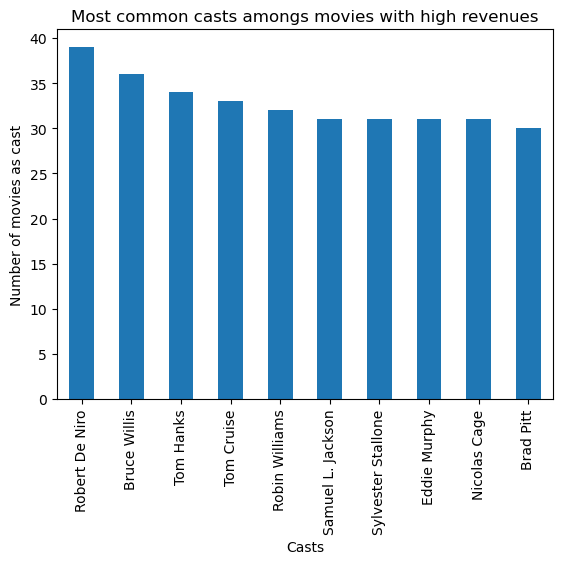

In [37]:
high_rev_cast['cast'].value_counts().head(10).plot(kind = 'bar', title = 'Most common casts amongs movies with high revenues').set(xlabel='Casts', ylabel='Number of movies as cast')

The above cells shows the most common casts amongs the high revenue movies based on the number of movies acted and Robert De Niro ranked the highest with about 39 movies followed by Bruce Willis (36) and Tom Hanks(34)

<a id='conclusions'></a>
## Conclusions

The most common genre of movie in the dataset is Drama, Comedy and Thriller while the the most popular genre of movies from year to year are Adventures, Animmations and Fantasy.

Some characteristics of the movies with high revenue includes mean popularity of about 1.44, mean runtime of about 112.11, mean vote average of about 6.27, mean adjusted budget of about 53.13 millions and mean adjusted revenue of about 199 millions. Further explorations showed that the most common directors among the high revenue movies are Steven Spielberg and Clint Eastwood while the most common casts are Robert De Niro, Bruce Willis and Tom Hanks. Also, there appears to be some sort of positive correlation between the adjusted budget and adjusted revenue of these movies with high revenues although further analysis may be required to confirm strength of correlation.

**Limitations**
- The correlation betweeen the Adjusted budget and Adjusted revenue amongs the movies with high revenue was not definitive and an inferential analysis would have provided the strenth of correlation between the variables
- Descriptive analyis could not be used to test if there was a statistically signicant mean difference between the revenues of movies with with high revenue and those without
- Descriptive analyis could not also be used to determine causality between vote average and revenue